# Part A

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [29]:
emails = pd.read_csv("enron_practical_sample.csv")
emails

,text,label
0,"hello scott ,\r\nyour request is complete as f...",ham
1,this will clear your inbox\r\nof spam and porn...,spam
2,team :\r\nwe are fast approaching our june 1 d...,ham
3,here are the current issues related to var and...,ham
4,"to all women ,\r\nif your not satisfied with y...",spam
...,...,...
1995,thanks for clarifying that vince .\r\nvince j ...,ham
1996,- - - - - - - - - - - - - - - - - - - - - - - ...,ham
1997,greetings\r\nintruducing m i\r\nenjoy these gr...,spam
1998,"yes , i sent a reply to gillian .\r\n- - stinson",ham


In [38]:
train_text_df, test_text_df = train_test_split(emails, test_size=0.2)

train_labels = train_text_df['label']
train_text = train_text_df['text']

test_labels = test_text_df['label']
test_text = test_text_df['text']

In [48]:
test_text.iloc[0]

"hello !\r\nviagra is the # 1 med to struggle with mens ' erectile dysfunction .\r\nlike one jokes sais , it is stronq enouqh for a man , but made for a woman ; - )\r\norderinq viagra online is a very convinient , fast and secure way !\r\nmiilions of peopie do it daily to save their privacy and money\r\norder here . . .\r\n"

In [35]:
vectoriser = TfidfVectorizer(stop_words="english", ngram_range=(2, 4), min_df=5, max_df=0.9)
X_train = vectoriser.fit_transform(train_text)

In [36]:
# Vocabulary size
vocab_size = len(vectoriser.vocabulary_)
print(f"Vocabulary size: {vocab_size}")

# Top 10 weighted terms (highest IDF scores)
idf_series = pd.Series(vectoriser.idf_, index=vectoriser.get_feature_names_out())
top_10_terms = idf_series.nlargest(10)
print("\nTop 10 weighted terms:")
print(top_10_terms)

Vocabulary size: 4497

Top 10 weighted terms:
000 000 individual             6.586624
000 company                    6.586624
000 day                        6.586624
000 individual                 6.586624
01 07                          6.586624
01 10                          6.586624
01 24                          6.586624
01 30                          6.586624
01 hourahead hour ancillary    6.586624
01 usa                         6.586624
dtype: float64


# Part B

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Combine all text for visualization
all_text = pd.concat([train_text, test_text])
all_labels = pd.concat([train_labels, test_labels])

# Vectorize with moderate feature budget
vectoriser = TfidfVectorizer(max_features=1000, stop_words="english")
X_tfidf = vectoriser.fit_transform(all_text)

# Reduce to 2D with UMAP
reducer = umap.UMAP(n_components=2, random_state=2025, n_neighbors=50, metric='cosine')
embedding = reducer.fit_transform(X_tfidf)

C:\Users\ryanw\Documents\GitHub\Uni-Work\MRes\Teaching\comp-wk10\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


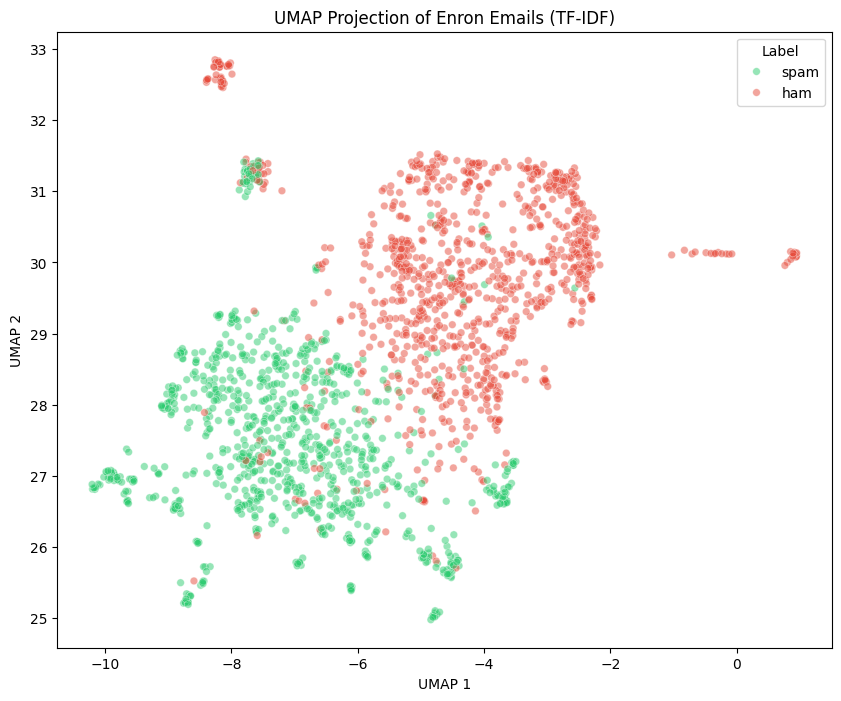

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=all_labels, palette=["#2ecc71", "#e74c3c"], alpha=0.5, s=30)
plt.title("UMAP Projection of Enron Emails (TF-IDF)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Label")
plt.show()

# Part C

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [46]:
pipeline = Pipeline([("vectoriser", TfidfVectorizer(max_features=1000, stop_words="english", min_df=5, max_df=0.8, ngram_range=(1, 2))),
                     ("model", LogisticRegression(max_iter=500))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)

metrics = cross_validate(pipeline, train_text, train_labels,
                         cv=cv, scoring=["accuracy", "f1_macro"],
                         return_train_score=True)
metrics

{'fit_time': array([0.74561238, 0.8409183 , 0.59767795, 0.59473443, 0.56435037]),
 'score_time': array([0.09519482, 0.05488944, 0.04958844, 0.0501895 , 0.06625628]),
 'test_accuracy': array([0.98125 , 0.94375 , 0.965625, 0.928125, 0.971875]),
 'train_accuracy': array([0.978125  , 0.9828125 , 0.9796875 , 0.98203125, 0.97734375]),
 'test_f1_macro': array([0.98124927, 0.94374121, 0.96561661, 0.92803997, 0.97187253]),
 'train_f1_macro': array([0.97812415, 0.98281212, 0.97968705, 0.98203098, 0.97734141])}

In [45]:
print(metrics["test_f1_macro"].mean() )
print(metrics["test_accuracy"].mean())

0.9572616539076538
0.9573333333333334


In [50]:
pipeline.fit(train_text, y=train_labels)

,steps,"[('vectoriser', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [53]:
predictions = pipeline.predict(test_text)

probabilities = pipeline.predict_proba(test_text)

acc = pipeline.score(test_text, y=test_labels, scoring='accuracy')
f1 = pipeline.score(test_text, y=test_labels, scoring='f1_macro')

confusion_matrix(test_labels, predictions)

hello !
viagra is the # 1 med to struggle with mens ' erectile dysfunction .
like one jokes sais , it is stronq enouqh for a man , but made for a woman ; - )
orderinq viagra online is a very convinient , fast and secure way !
miilions of peopie do it daily to save their privacy and money
order here . . .



array([[179,  12],
       [  0, 209]])

# Part D

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import Bunch
import numpy as np

best_params = {
    "max_features": 1000,
    "stop_words": "english",
    "min_df": 5, 
    "max_df": 0.8, 
    "ngram_range": (1, 2)
}

In [15]:
def train_with_c(C=1.0, penalty="l2") -> Bunch:
    pipeline = Pipeline([("vectoriser", TfidfVectorizer(**best_params)),
                         ("model", LogisticRegression(max_iter=1000, C=C, penalty=penalty,
                                                      solver="liblinear" if penalty == "l1" else "lbfgs"))])
    
    pipeline.fit(train_text, train_labels)
    return Bunch(pipeline=pipeline,
                 coefficients=pipeline.named_steps["model"].coef_[0],
                 vocab=pipeline.named_steps["vectoriser"].get_feature_names_out())

In [16]:
C_trials = [0.1, 1, 10, 1]
penalties = ['l2', 'l2', 'l2', 'l1']

plot_labels = ['C=0.1\np=l2', 'C=1\np=l2', 'C=10\np=l2', 'C=1\np=l1']

bunches = []

for i, [c, penalty] in enumerate(zip(C_trials, penalties)):
    print(i)
    bunches.append(train_with_c(C=c, penalty=penalty))

0
1
2
3


In [17]:
bunches[0]

{'pipeline': Pipeline(steps=[('vectoriser',
                  TfidfVectorizer(max_df=0.8, max_features=1000, min_df=5,
                                  ngram_range=(1, 2), stop_words='english')),
                 ('model', LogisticRegression(C=0.1, max_iter=1000))]),
 'coefficients': array([-2.11537635e-01, -4.66595067e-02,  4.37787622e-02, -4.02782286e-01,
        -2.88865460e-01, -1.91558457e-01, -1.69232991e-01, -1.31667430e-01,
        -1.33021676e-01, -4.61108614e-02, -1.44063068e-01, -1.77701433e-01,
        -6.96030654e-02, -2.05062518e-01, -5.68729230e-02,  2.41189009e-01,
        -3.28965516e-01, -7.09641145e-02, -2.93773204e-01, -1.76454725e-01,
        -1.05552583e-01, -1.00856815e-01, -1.42763347e-01, -9.33553305e-02,
        -1.63106502e-02, -5.76287606e-02, -7.11261953e-04, -2.81453928e-02,
         2.53381584e-02,  3.82537714e-02, -5.95140307e-01, -5.70020541e-02,
        -8.90176621e-02, -1.79044474e-02, -7.98060018e-01, -8.32160188e-02,
        -8.00381121e-03,  9.979

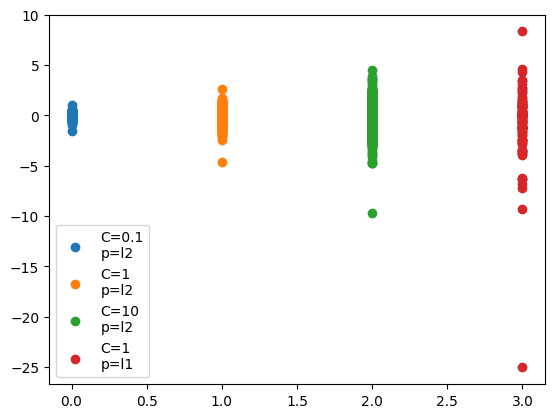

In [18]:
fig, ax = plt.subplots()

for i in range(4):
    ax.scatter(i * np.ones(1000), bunches[i]['coefficients'], label=plot_labels[i])
ax.legend()

In [19]:
winner = bunches[-1]

In [20]:
sorted_inds = np.argsort(winner['coefficients']).flatten()

lowest_inds = sorted_inds[:5]
highest_inds = sorted_inds[-5:]

lowest_coeffs = winner['coefficients'][lowest_inds]
lowest_values = winner['vocab'][lowest_inds]

highest_coeffs = winner['coefficients'][highest_inds]
highest_values = winner['vocab'][highest_inds]

print(lowest_coeffs, lowest_values)
print(highest_coeffs, highest_values)

[-25.04314499  -9.31718923  -7.23493154  -6.76410407  -6.33484093] ['enron' '2001' 'attached' 'let know' 'louise']
[3.46301989 3.56389086 4.34333647 4.65103827 8.34347813] ['company' 'save' 'stop' 'money' 'http']


# Part E

In [21]:
probabilities

array([[0.80675471, 0.19324529],
       [0.53395211, 0.46604789],
       [0.85687376, 0.14312624],
       [0.2358287 , 0.7641713 ],
       [0.87704839, 0.12295161],
       [0.12144762, 0.87855238],
       [0.05786831, 0.94213169],
       [0.14607515, 0.85392485],
       [0.08513444, 0.91486556],
       [0.27493712, 0.72506288],
       [0.13209618, 0.86790382],
       [0.91241679, 0.08758321],
       [0.93289453, 0.06710547],
       [0.9895754 , 0.0104246 ],
       [0.88875965, 0.11124035],
       [0.86662624, 0.13337376],
       [0.10081724, 0.89918276],
       [0.93080719, 0.06919281],
       [0.16452222, 0.83547778],
       [0.18278395, 0.81721605],
       [0.37198028, 0.62801972],
       [0.97506175, 0.02493825],
       [0.94740157, 0.05259843],
       [0.14611035, 0.85388965],
       [0.18852092, 0.81147908],
       [0.10706984, 0.89293016],
       [0.93164493, 0.06835507],
       [0.81234404, 0.18765596],
       [0.88766319, 0.11233681],
       [0.76208302, 0.23791698],
       [0.

In [22]:
misclass_inds = predictions != test_labels.values

prob_spam = np.array(probabilities[misclass_inds])[:, 1]

misclassifications = pd.DataFrame({'text': test_text[misclass_inds],
                                  'true_label': test_labels.values[misclass_inds],
                                  'predicted': predictions[misclass_inds],
                                  'probability': prob_spam}).reset_index()
misclassifications

,index,text,true_label,predicted,probability
0,970,across the country\r\nstar information technol...,ham,spam,0.680406
1,828,"dear ut team ,\r\ngood news and bad . . . .\r\...",ham,spam,0.625596
2,1785,"for your information , here is the answer that...",ham,spam,0.554944
3,1503,westvaco is a brand new company . i have added...,ham,spam,0.532500
4,921,are we doing atm rings for sempra and kinder ?...,ham,spam,0.594323
5,973,speaking of housing . . . . i own a house near...,ham,spam,0.518010
6,661,tomorrow is the last day of the ets food & toy...,ham,spam,0.534529
7,1108,hanover ' s stock price closed at $ 35 . 26 to...,ham,spam,0.508152
8,1306,treebeard ' s\r\n?\r\ni am hooked . name the t...,ham,spam,0.606362
9,1695,kgonxe . idkylzdppzvrtdi . hjtkye . . wq 4 jd ...,spam,ham,0.341007
